In [1]:
# genre feature training

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import numpy as np
import scipy.stats as stats
pd.options.display.max_columns = 10000

In [10]:
df_genres = pd.read_csv('df_genres.csv')

In [11]:
df_genres.head()

,Unnamed: 0,title,year,director,running_time,views,likes,avg_rating,half_star,one_star,one_half_star,two_star,two_half_star,three_star,three_half_star,four_star,four_half_star,five_star,genre
0,0,Get Out,2017.0,Jordan Peele,104,605132,261668,4.1,647,1560,1001,5727,5821,34069,45053,136842,65726,110264,horror
1,1,Zombieland,2009.0,Ruben Fleischer,88,339357,77110,3.6,477,1384,1353,6280,9055,37228,43168,53117,10931,11907,horror
2,2,Suspiria,2018.0,Luca Guadagnino,152,122728,37820,3.7,611,1253,1266,4151,4844,12282,15033,25865,13732,12889,horror
3,3,Halloween,1978.0,John Carpenter,91,212751,59124,4.0,204,700,602,3003,3627,15715,17598,35627,14882,29077,horror
4,4,Rosemary's Baby,1968.0,Roman Polanski,137,158689,46272,4.2,156,372,253,1326,1412,6933,9562,27455,18616,24435,horror


In [12]:
df_genres.describe(include='all')

,Unnamed: 0,title,year,director,running_time,views,likes,avg_rating,half_star,one_star,one_half_star,two_star,two_half_star,three_star,three_half_star,four_star,four_half_star,five_star,genre
count,40018.000000,40018,39998.00000,39636,40018.000000,40018.000000,40018.000000,40018.000000,40018.000000,40018.000000,40018.000000,40018.000000,40018.000000,40018.000000,40018.000000,40018.000000,40018.000000,40018.000000,40018
unique,NaN,30378,NaN,16292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,Frankenstein,NaN,Chuck Jones,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,thriller
freq,NaN,18,NaN,221,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12836
mean,4892.286471,NaN,1994.90747,NaN,80.726548,6826.995702,1316.224424,2.972707,54.423484,111.778300,105.667125,293.829577,309.652281,720.899595,614.732420,820.867235,299.167150,403.334599,NaN
std,3334.753389,NaN,23.84132,NaN,42.044645,34009.245241,9260.254979,0.473895,329.131089,570.423667,474.780097,1275.813010,1253.326690,3208.731177,2979.839044,5347.700701,2518.510737,4304.396370,NaN
min,0.000000,NaN,1885.00000,NaN,1.000000,33.000000,0.000000,0.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,2000.250000,NaN,1982.00000,NaN,73.000000,109.250000,11.000000,2.700000,1.000000,2.000000,3.000000,8.000000,8.000000,13.000000,7.000000,4.000000,1.000000,1.000000,NaN
50%,4457.000000,NaN,2004.00000,NaN,90.000000,288.000000,34.000000,3.000000,4.000000,8.000000,9.000000,20.000000,21.000000,36.000000,22.000000,15.000000,3.000000,4.000000,NaN
75%,7335.000000,NaN,2014.00000,NaN,100.000000,1271.000000,165.000000,3.300000,16.000000,31.000000,33.000000,82.000000,90.000000,172.000000,113.000000,87.000000,18.000000,22.000000,NaN


In [13]:
df_genres.isna().sum()

Unnamed: 0           0
title                0
year                20
director           382
running_time         0
views                0
likes                0
avg_rating           0
half_star            0
one_star             0
one_half_star        0
two_star             0
two_half_star        0
three_star           0
three_half_star      0
four_star            0
four_half_star       0
five_star            0
genre                0
dtype: int64

In [15]:
import missingno as msno
msno.matrix(data_r)
plt.show()

ModuleNotFoundError: No module named 'missingno'

In [16]:
df_genres['director'] = df_genres['director'].fillna('directorNA')
df_genres.isna().sum()

Unnamed: 0          0
title               0
year               20
director            0
running_time        0
views               0
likes               0
avg_rating          0
half_star           0
one_star            0
one_half_star       0
two_star            0
two_half_star       0
three_star          0
three_half_star     0
four_star           0
four_half_star      0
five_star           0
genre               0
dtype: int64

In [ ]:
df_genres['year_isna'] = df_genres['year'].isna()

In [17]:
# Hyperparameter testing 1 - year as mean
# df_genres['year'] = df_genres['year'].fillna(df_genres['year'].mean())
df_genres['year'] = df_genres['year'].fillna(0)

In [18]:
# genre feature model training

In [19]:
model = LinearRegression()

In [20]:
X = pd.get_dummies(df_genres['genre'])
X

,animation,horror,scifi,thriller,war
0,0,1,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,0,1,0,0,0
4,0,1,0,0,0
...,...,...,...,...,...
40013,1,0,0,0,0
40014,1,0,0,0,0
40015,1,0,0,0,0
40016,1,0,0,0,0


In [21]:
y = df_genres['avg_rating']

In [22]:
X_train_true, X_test_true, y_train_true, y_test_true = train_test_split(X, y, test_size = 0.3, random_state=42)

In [23]:
model.fit(X_train_true, y_train_true)

LinearRegression()

In [25]:
y_test_pred = model.predict(X_test_true)

In [26]:
model.score(X_test_true, y_test_true)

0.11451311872464776

In [27]:
# predictive power for this feature
model.coef_

array([5.07951663e+11, 5.07951663e+11, 5.07951663e+11, 5.07951663e+11,
       5.07951663e+11])

In [28]:
pd.Series(y_test_pred).unique()

array([2.9407959 , 2.81591797, 2.8973999 , 3.21600342, 3.27819824])

In [29]:
rmse = np.sqrt(mean_squared_error(y_test_true, y_test_pred))
rmse

0.44873937359966537

In [30]:
y_error = y_test_pred - y_test_true
y_error

22949    0.440796
22690   -0.159204
2299     0.315918
8671    -0.084082
29288   -0.759204
           ...   
37363   -0.383997
6280     0.215918
5953    -0.584082
16847   -0.102600
25071   -0.059204
Name: avg_rating, Length: 12006, dtype: float64

In [31]:
standard_error = ((y_error**2).mean())**0.5
standard_error

0.4487393735996664

In [35]:
#compute z score
stats.zscore(y_error)

array([ 0.97090744, -0.3662593 ,  0.69260308, ..., -1.31314703,
       -0.24011098, -0.14339818])

In [ ]:
#visualize accuracy

In [33]:
from yellowbrick.regressor import PredictionError, ResidualsPlot
visualizer = PredictionError(model)
visualizer.fit(X_train_true, y_train_true)  
visualizer.score(X_test_true, y_test_true)  
visualizer.poof()

ModuleNotFoundError: No module named 'yellowbrick'

<AxesSubplot:xlabel='avg_rating'>

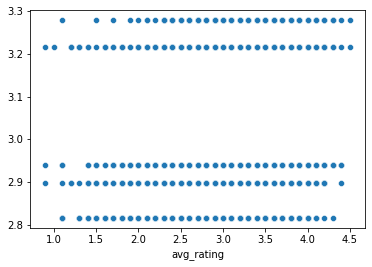

In [55]:
sns.scatterplot(x=y_test_true, y=y_test_pred)
# plt.show()

In [ ]:
# experiment 2 - replace year with median

In [36]:
df_genres['year'] = df_genres['year'].fillna(df_genres['year'].median())
df_genres.isna().sum()

Unnamed: 0         0
title              0
year               0
director           0
running_time       0
views              0
likes              0
avg_rating         0
half_star          0
one_star           0
one_half_star      0
two_star           0
two_half_star      0
three_star         0
three_half_star    0
four_star          0
four_half_star     0
five_star          0
genre              0
dtype: int64

In [37]:
X_train_true, X_test_true, y_train_true, y_test_true = train_test_split(X, y, test_size = 0.3, random_state=42)

In [38]:
model.fit(X_train_true, y_train_true)

LinearRegression()

In [39]:
y_test_pred = model.predict(X_test_true)

In [40]:
model.score(X_test_true, y_test_true)

0.11451311872464776

In [41]:
model.coef_

array([5.07951663e+11, 5.07951663e+11, 5.07951663e+11, 5.07951663e+11,
       5.07951663e+11])

In [42]:
pd.Series(y_test_pred).unique()

array([2.9407959 , 2.81591797, 2.8973999 , 3.21600342, 3.27819824])

In [43]:
rmse = np.sqrt(mean_squared_error(y_test_true, y_test_pred))
rmse

0.44873937359966537

In [44]:
y_error = y_test_pred - y_test_true
y_error

22949    0.440796
22690   -0.159204
2299     0.315918
8671    -0.084082
29288   -0.759204
           ...   
37363   -0.383997
6280     0.215918
5953    -0.584082
16847   -0.102600
25071   -0.059204
Name: avg_rating, Length: 12006, dtype: float64

In [45]:
standard_error = ((y_error**2).mean())**0.5
standard_error

0.4487393735996664

In [46]:
stats.zscore(y_error)

array([ 0.97090744, -0.3662593 ,  0.69260308, ..., -1.31314703,
       -0.24011098, -0.14339818])

In [ ]:
#experiment 3 - impute missing values

In [48]:
#fill values with NaN instead of 0? find axis for yearS=
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN', strategy='most_frequent', axis=0)
X_train_true, X_test_true, y_train_true, y_test_true = train_test_split(X, y, test_size = 0.3, random_state=42)
imputer = imp.fit(X_train_true)

ImportError: cannot import name 'Imputer' from 'sklearn.preprocessing' (/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/__init__.py)

In [ ]:
imp_test = imp.transform(X_test_true)

In [ ]:
y_test_pred = model.predict(X_test_true)

In [ ]:
model.score(X_test_true, y_test_true)

In [ ]:
model.coef_

In [ ]:
pd.Series(y_test_pred).unique()

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test_true, y_test_pred))
rmse

In [ ]:
y_error = y_test_pred - y_test_true
y_error

In [ ]:
standard_error = ((y_error**2).mean())**0.5
standard_error

In [ ]:
stats.zscore(y_error)

In [ ]:
#export best model as new DF